<a href="https://colab.research.google.com/github/saywoogie/python-django/blob/main/%EB%8B%B4%EB%B0%B0%EA%B0%91%EB%B6%84%EB%A5%98%EC%B5%9C%EC%A2%85_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                                                                                                                                                           !sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direct

In [ ]:
import os
import shutil


directory_list = [
    './drive/MyDrive/cigarClass/train/',
    './drive/MyDrive/cigarClass/test/',
]

for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms
resnet34 = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1)

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 156MB/s]


In [ ]:
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './drive/MyDrive/cigarClass/'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 150
테스트 데이터셋 크기: 50
클래스: ['esseChange1mg', 'esseChange1mgUp', 'esseChange4mg', 'marlboroMedium', 'marlboroRed']


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


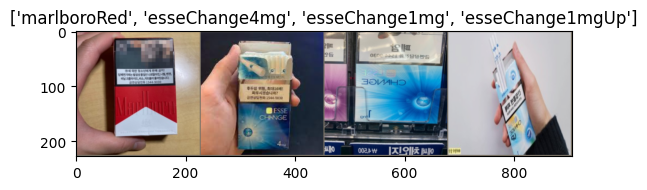

In [ ]:
def imshow(input, title):
    input = input.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    plt.imshow(input)
    plt.title(title)
    plt.show()

iterator = iter(train_dataloader)

inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 클래스 개수에 따라 밑의 숫자를 변경하자
model.fc = nn.Linear(num_features, 5)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_epochs = 80
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.


    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))



#0 Loss: 1.2599 Acc: 46.0000% Time: 26.5341s
#1 Loss: 0.6822 Acc: 73.3333% Time: 28.3216s
#2 Loss: 0.2269 Acc: 93.3333% Time: 30.0723s
#3 Loss: 0.3126 Acc: 87.3333% Time: 31.8109s
#4 Loss: 0.2754 Acc: 92.0000% Time: 33.6551s
#5 Loss: 0.1586 Acc: 96.0000% Time: 36.2899s
#6 Loss: 0.1441 Acc: 94.6667% Time: 40.7016s
#7 Loss: 0.0947 Acc: 98.0000% Time: 42.4542s
#8 Loss: 0.2022 Acc: 93.3333% Time: 44.2091s
#9 Loss: 0.1122 Acc: 97.3333% Time: 46.0512s
#10 Loss: 0.1612 Acc: 95.3333% Time: 47.8141s
#11 Loss: 0.1121 Acc: 96.6667% Time: 49.5624s
#12 Loss: 0.1405 Acc: 96.6667% Time: 51.6194s
#13 Loss: 0.1972 Acc: 93.3333% Time: 54.2259s
#14 Loss: 0.1991 Acc: 92.0000% Time: 56.7475s
#15 Loss: 0.0750 Acc: 98.6667% Time: 58.7047s
#16 Loss: 0.0955 Acc: 97.3333% Time: 60.4288s
#17 Loss: 0.0745 Acc: 98.0000% Time: 62.1858s
#18 Loss: 0.0500 Acc: 98.0000% Time: 63.9492s
#19 Loss: 0.1282 Acc: 96.6667% Time: 65.7874s
#20 Loss: 0.1651 Acc: 96.0000% Time: 67.5764s
#21 Loss: 0.1417 Acc: 96.6667% Time: 70.3367

[예측 결과: marlboroRed] (실제 정답: marlboroRed)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


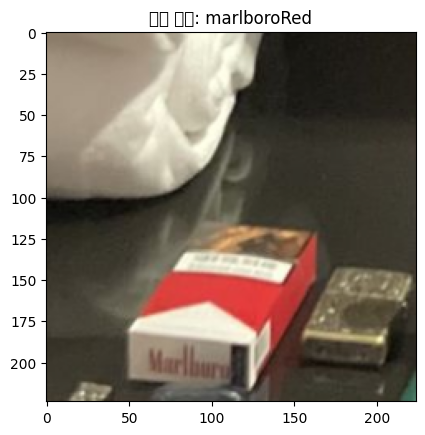

[예측 결과: esseChange4mg] (실제 정답: esseChange4mg)


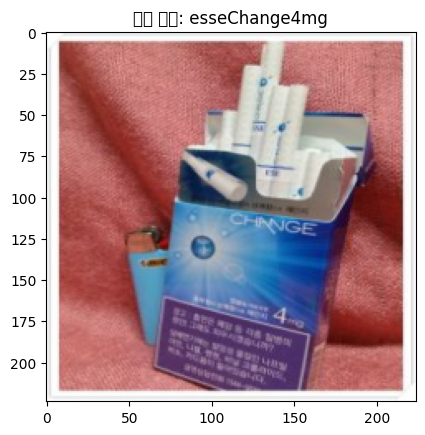

[예측 결과: marlboroMedium] (실제 정답: marlboroMedium)


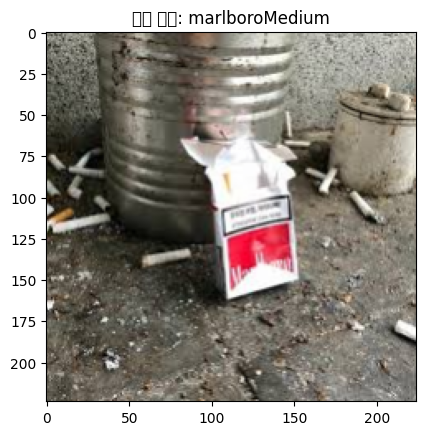

[예측 결과: esseChange4mg] (실제 정답: esseChange4mg)


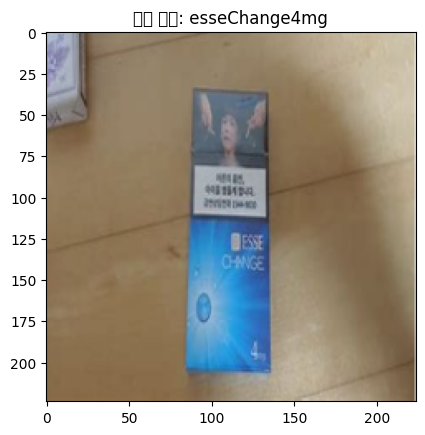

[예측 결과: marlboroMedium] (실제 정답: marlboroMedium)


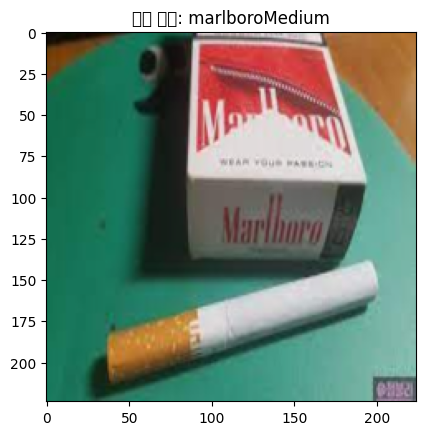

[예측 결과: marlboroRed] (실제 정답: marlboroRed)


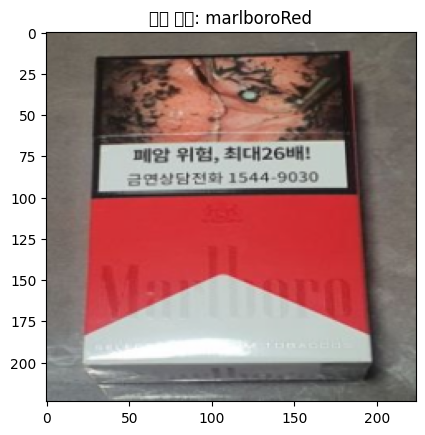

[예측 결과: esseChange1mgUp] (실제 정답: esseChange1mgUp)


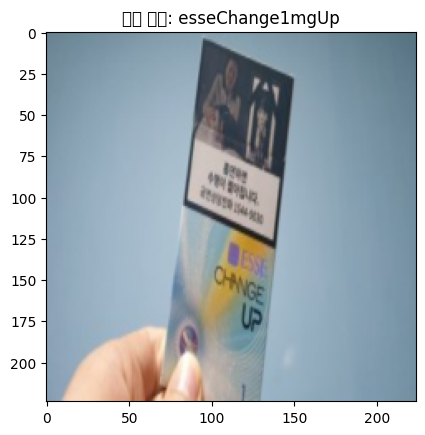

[예측 결과: esseChange1mgUp] (실제 정답: esseChange1mgUp)


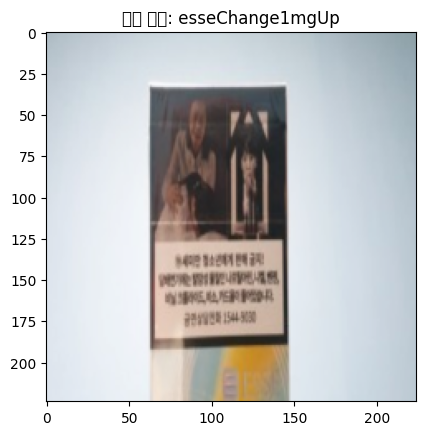

[예측 결과: esseChange1mgUp] (실제 정답: esseChange1mgUp)


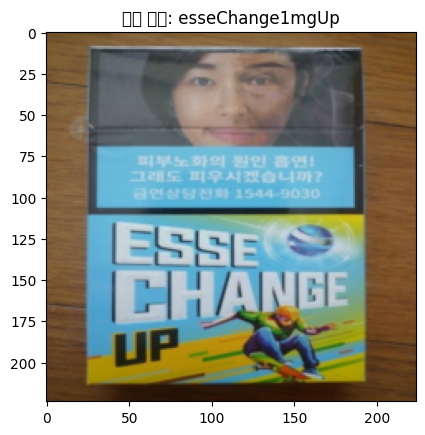

[예측 결과: marlboroMedium] (실제 정답: marlboroMedium)


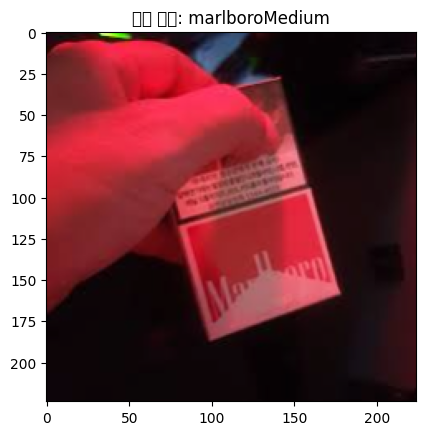

[예측 결과: marlboroRed] (실제 정답: marlboroRed)


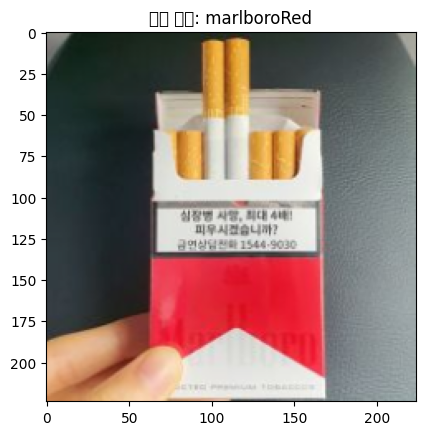

[예측 결과: esseChange1mgUp] (실제 정답: esseChange1mgUp)


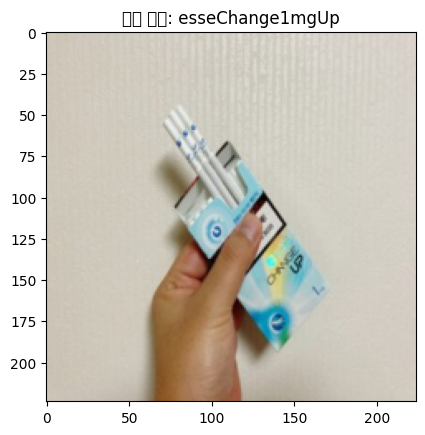

[예측 결과: marlboroRed] (실제 정답: marlboroRed)


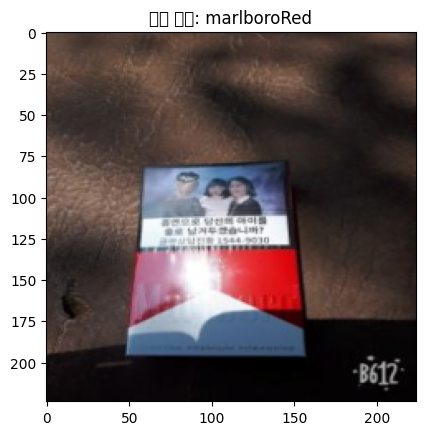

[Test Phase] Loss: 0.0913 Acc: 98.0000% Time: 10.1652s


In [ ]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

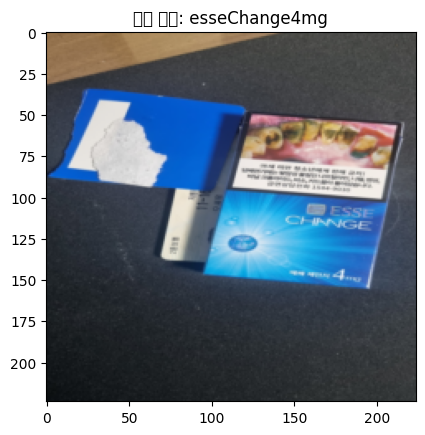

In [ ]:
from PIL import Image

image = '/content/drive/MyDrive/apitest/firstTest.jpg'

image = Image.open(image)
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])